In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
books = pd.read_csv('bookclub_book_detail_FINAL.csv')
books_club_info = books.drop(['url','bookshelf_link','author_y','title_y',
                              'author_x','title_x','num_pages','num_ratings','rating','year_published'], axis=1)
books_book_info = books.drop(['url','bookshelf_link','author_x','title_x','category',
                             'curr_reading_authors','curr_reading_titles','group_type','location',
                             'member_cnt','tags'], axis=1)

Text(0.5,1,'Histogram of Member Count (Large Bookclubs)')

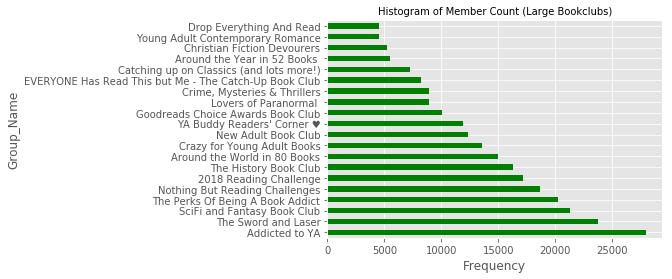

In [3]:
books_club_info.groupby('Group_Name')['member_cnt'].median().sort_values(ascending=False).plot.barh(color='g')
plt.xlabel('Frequency')
#plt.ylabel('Frequency')
plt.title('Histogram of Member Count (Large Bookclubs)', fontsize=10)

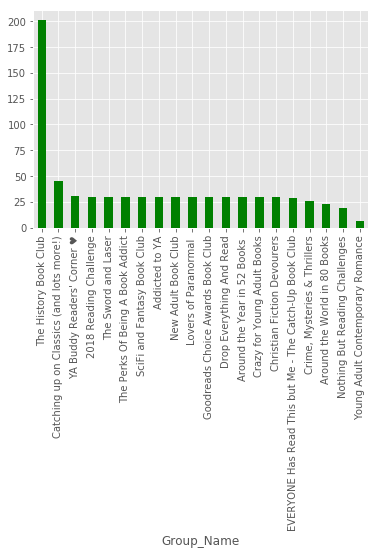

In [4]:
books_club_info.groupby('Group_Name')['avg_time_per_book'].median().sort_values(ascending=False).plot.bar(color='g')

Text(0.5,1,'Median Number of Pages (Large Bookclubs)')

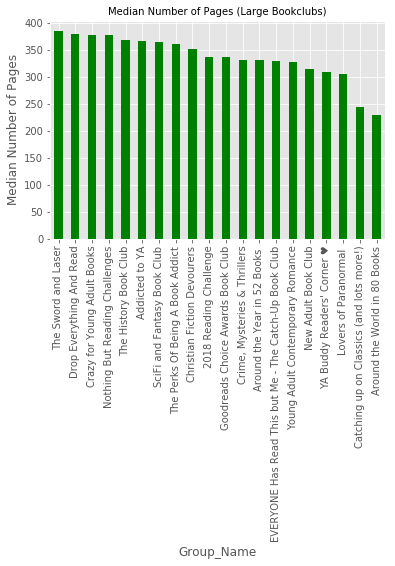

In [5]:
books.groupby('Group_Name')['num_pages'].median().sort_values(ascending=False).plot.bar(color='g')
#plt.xlabel('Frequency')
plt.ylabel('Median Number of Pages')
plt.title('Median Number of Pages (Large Bookclubs)', fontsize=10)

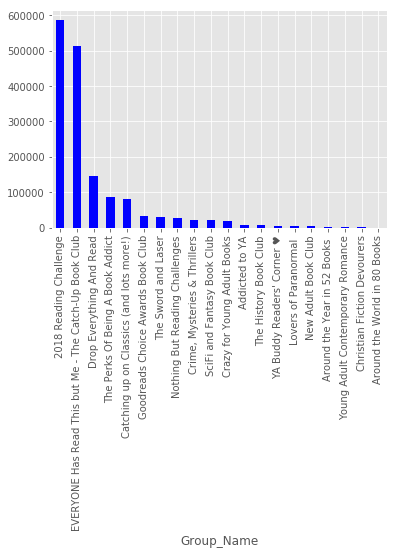

In [6]:
books.groupby('Group_Name')['num_ratings'].median().sort_values(ascending=False).plot.bar(color='b')

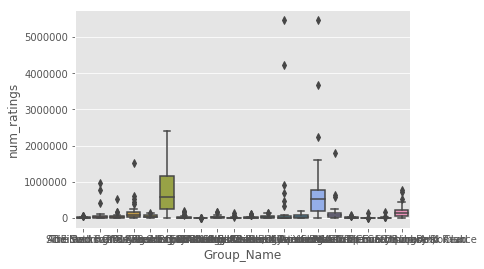

In [7]:
#c = books[books.num_ratings < 2000]
sns.boxplot('Group_Name','num_ratings', data=books)

Text(0.5,1,'Distribution of Number of Ratings (Large Groups)')

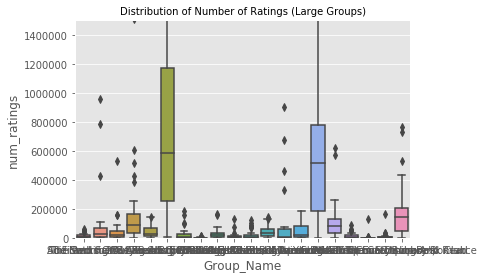

In [28]:
sns.boxplot('Group_Name','num_ratings', data=books)
plt.ylim(0,1500000)
plt.title('Distribution of Number of Ratings (Large Groups)', fontsize=10)

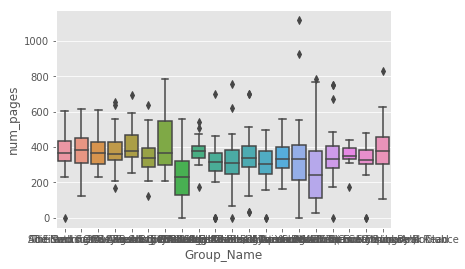

In [9]:
sns.boxplot('Group_Name','num_pages', data=books)

Text(0.5,1,'Rating Distribution(Large Bookclubs)')

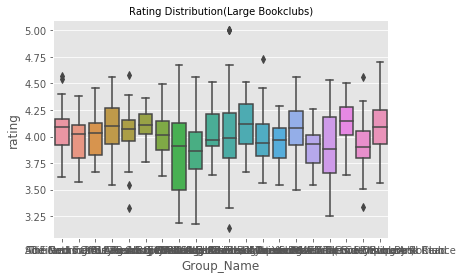

In [10]:
#sns.boxplot('Group_Name','rating', data=books)
#books[books['rating']==0]
#b = np.delete(books, 236)
b = books[books.rating != 0]
sns.boxplot('Group_Name','rating', data=b)
plt.title('Rating Distribution(Large Bookclubs)', fontsize=10)

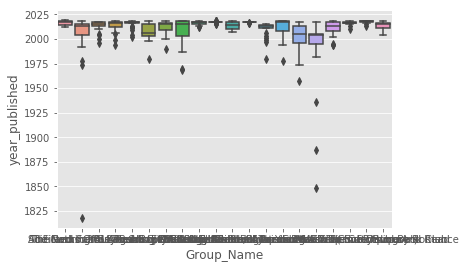

In [11]:
sns.boxplot('Group_Name','year_published', data=books)

In [12]:
books_club_info2 = books_club_info.groupby('Group_Name').first()
num_curr_reading = []

for x in range(0,len(books_club_info2)):
    num_curr_reading.append(books_club_info2['curr_reading_authors'][x].count(',')+1)
    
books_club_info2['num_curr_reading'] = num_curr_reading

In [13]:
books_book_info3 = books_book_info.groupby(['Group_Name'])
colFun = {'author_y': ['count'],
          'title_y':['count'],
          'num_pages':['min', 'max','median','mean'],
          'num_ratings':['min', 'max','median','mean'],
          'rating':['min', 'max','median','mean'],
          'year_published':['min', 'max','median','mean']}
books_book_info2=books_book_info3.agg(colFun)

GR_data = pd.merge(books_book_info2, books_club_info2, how='left', on ='Group_Name')

/Users/sunandamishra/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


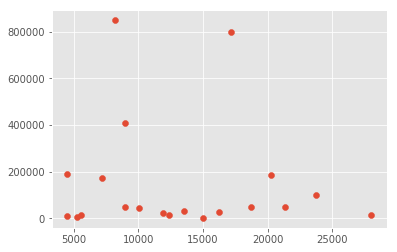

In [14]:
#plt.scatter(GR_data['member_cnt'], GR_data[('num_ratings', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_ratings', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_ratings', 'max')])
plt.scatter(GR_data['member_cnt'], GR_data[('num_ratings', 'mean')])

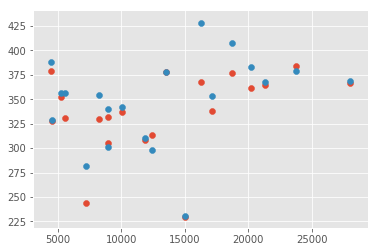

In [15]:
plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'max')])
plt.scatter(GR_data['member_cnt'], GR_data[('num_pages', 'mean')])

Text(0.5,1,'Median Number of Pages (Large Bookclubs)')

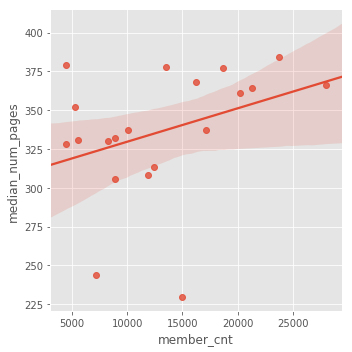

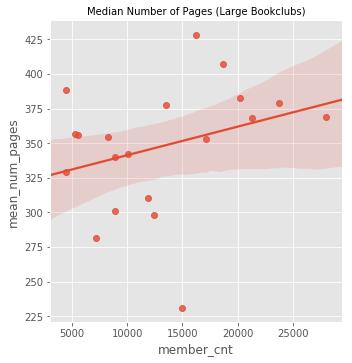

In [26]:
GR_data = GR_data.rename(columns={('num_pages', 'median'): 'median_num_pages',
                                 ('num_pages', 'mean'): 'mean_num_pages'})
sns.lmplot('member_cnt', 'median_num_pages', GR_data)
sns.lmplot('member_cnt', 'mean_num_pages', GR_data)
plt.title('Median Number of Pages (Large Bookclubs)', fontsize=10)

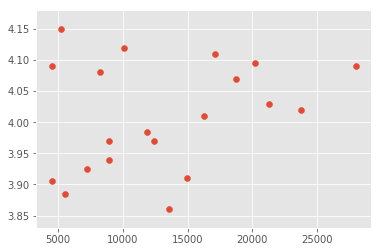

In [17]:
plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'max')])
#plt.scatter(GR_data['member_cnt'], GR_data[('rating', 'mean')])

Text(0.5,1,'Median Book Rating (Large Bookclubs)')

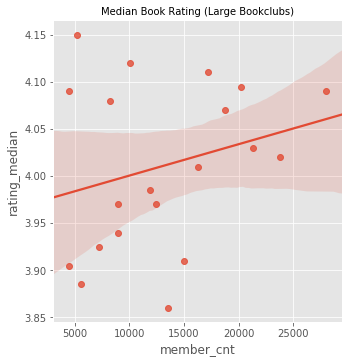

In [27]:
GR_data = GR_data.rename(columns={('rating', 'median'): 'rating_median'})
sns.lmplot('member_cnt', 'rating_median', GR_data)
plt.title('Median Book Rating (Large Bookclubs)', fontsize=10)

Text(0.5,1,'Median Number of Pages (Large Bookclubs)')

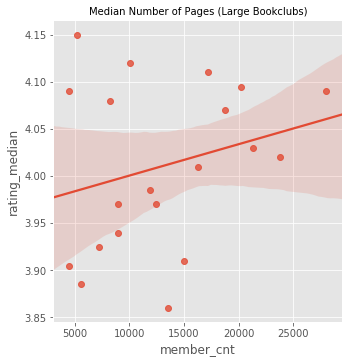

In [24]:
GR_data = GR_data.rename(columns={('rating', 'median'): 'rating_median'})
sns.lmplot('member_cnt', 'rating_median', GR_data)
plt.title('Median Number of Pages (Large Bookclubs)', fontsize=10)

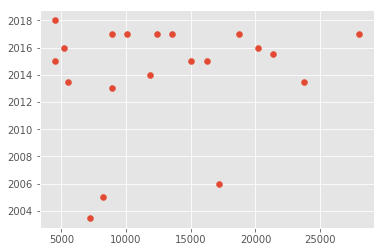

In [19]:
plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'median')])
#plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'min')])
#plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'max')])
#plt.scatter(GR_data['member_cnt'], GR_data[('year_published', 'mean')])

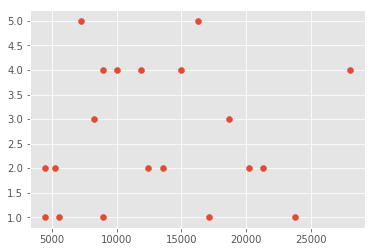

In [20]:
plt.scatter(GR_data['member_cnt'], GR_data[('num_curr_reading')])

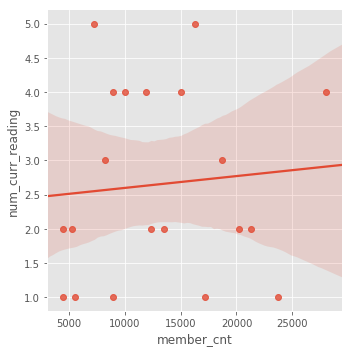

In [21]:
sns.lmplot('member_cnt', 'num_curr_reading', GR_data)

In [22]:
GR_data['num_curr_reading']

Group_Name
2018 Reading Challenge                                    1
Addicted to YA                                            4
Around the World in 80 Books                              4
Around the Year in 52 Books                               1
Catching up on Classics (and lots more!)                  5
Christian Fiction Devourers                               2
Crazy for Young Adult Books                               2
Crime, Mysteries & Thrillers                              4
Drop Everything And Read                                  2
EVERYONE Has Read This but Me - The Catch-Up Book Club    3
Goodreads Choice Awards Book Club                         4
Lovers of Paranormal                                      1
New Adult Book Club                                       2
Nothing But Reading Challenges                            3
SciFi and Fantasy Book Club                               2
The History Book Club                                     5
The Perks Of Being A Book Add